In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

In [ ]:


files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anukulrathore","key":"accd1132967b5de01c18a9ad277e0fbb"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:


! chmod 600 ~/.kaggle/kaggle.json



In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete             World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-08 17:42:25           1394  
gpreda/pfizer-vaccine-tweets                                   Pfizer Vaccine Tweets                               439KB  2021-01-08 11:13:45            965  
google/android-smartphones-high-accuracy-datasets              Android smartphones high accuracy GNSS datasets       1GB  2020-12-23 01:51:11            326  
ashkhagan/women-representation-in-city-property-sanfrancisco   Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            210  
arashnic/covid19-case-surveillance-public-use-

In [ ]:
! kaggle datasets download -d moltean/fruits

 98% 745M/760M [00:04<00:00, 119MB/s]
100% 760M/760M [00:04<00:00, 160MB/s]


In [ ]:
! mkdir MMOODDEELL

In [ ]:
!unzip fruits.zip -d MMOODDEELL/

Streaming output truncated to the last 5000 lines.
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: MMOODDEELL/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

from glob import glob

In [ ]:
#set image size
image_size = [32,32]
#get path of both data
train_path = '/content/MMOODDEELL/fruits-360/Training'
valid_path = '/content/MMOODDEELL/fruits-360/Test'
#number of images
image_files = glob(train_path+'/*/*.jp*g')
valid_image_files = glob(valid_path+'/*/*.jp*g')
#number of classes
folders = glob(train_path+'/*')
#add preprocessing layers to vgg
vgg = VGG16(input_shape=(32,32,3),include_top=False)
for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
#layers
x = Flatten()(vgg.output)
x = Dense(1000,activation='relu')(x)

In [ ]:
#output layer
prediction = Dense(len(folders),activation='softmax')(x)

In [ ]:
#model object
model = Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input)

In [ ]:
test_gen = gen.flow_from_directory(valid_path,target_size=(image_size))
#label mapping for confusion matrix plot
labels = [None] * len(test_gen.class_indices)
for i,j in test_gen.class_indices.items():
  labels[j] = i

Found 22688 images belonging to 131 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -106.473816 max: 151.061


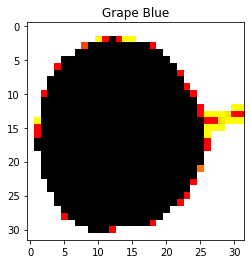

In [ ]:
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  
  break

In [ ]:
#data generator
train_generator = gen.flow_from_directory(train_path,target_size=(image_size))
valid_generator = gen.flow_from_directory(valid_path,target_size=(image_size))


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
#FIT MODEL
r = model.fit(train_generator,validation_data=valid_generator,epochs=5,validation_steps=len(valid_image_files) // 32)

Epoch 1/5
2116/2116 [==============================] - 104s 46ms/step - loss: 4.2433 - accuracy: 0.6240 - val_loss: 1.7230 - val_accuracy: 0.7580
Epoch 2/5
2116/2116 [==============================] - 94s 44ms/step - loss: 0.7313 - accuracy: 0.8606 - val_loss: 1.9325 - val_accuracy: 0.7942
Epoch 3/5
2116/2116 [==============================] - 94s 44ms/step - loss: 0.6517 - accuracy: 0.8870 - val_loss: 1.8291 - val_accuracy: 0.8169
Epoch 4/5
2116/2116 [==============================] - 93s 44ms/step - loss: 0.5931 - accuracy: 0.9018 - val_loss: 1.8854 - val_accuracy: 0.8233
Epoch 5/5
2116/2116 [==============================] - 93s 44ms/step - loss: 0.6008 - accuracy: 0.9097 - val_loss: 1.9129 - val_accuracy: 0.8328


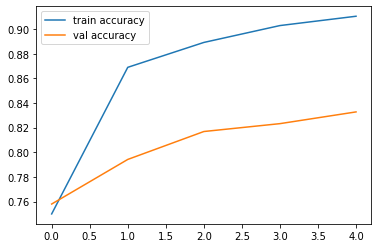

In [ ]:
#Accuracy graph
plt.plot(r.history['accuracy'],label = 'train accuracy')
plt.plot(r.history['val_accuracy'],label = 'val accuracy')
plt.legend()
plt.show()

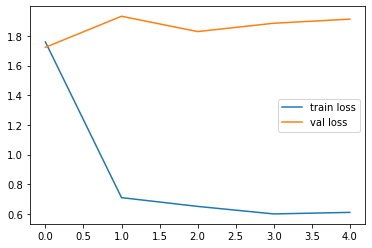

In [ ]:
#Loss graph
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()

In [ ]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order for both predictions and targets
  
  print("Generating confusion matrix", N)
  predictions = []
  targets = []

  for x, y in gen.flow_from_directory(data_path, target_size=image_size, shuffle=False, batch_size=32* 2):
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break
  cm = confusion_matrix(targets, predictions)
  return predictions, targets, cm

In [ ]:
predictions = []
targets = []

predictions, targets, cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 67692
Found 67692 images belonging to 131 classes.
[[146  19   0 ...   0   0   0]
 [  3 372   0 ...   0   0   0]
 [  0   0 428 ...   0   0   0]
 ...
 [  0   0   0 ... 450   0   0]
 [  0   0   0 ...   0 723   0]
 [  0   0   0 ...   1   0 472]]
Generating confusion matrix 22688
Found 22688 images belonging to 131 classes.
(array([  0.,   8.,   8., ..., 130., 130., 130.]), array([  0.,   0.,   0., ..., 130., 130., 130.]), array([[ 31,   3,   0, ...,   0,   0,   0],
       [ 10,  82,   0, ...,   0,   0,   0],
       [  0,   0, 120, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 120,   0,   0],
       [  0,   0,   0, ...,   0, 245,   0],
       [  0,   0,   0, ...,   0,   0, 151]]))


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(predictions,targets))

              precision    recall  f1-score   support

         0.0       0.30      0.80      0.43       183
         1.0       0.84      0.78      0.81       475
         2.0       0.89      0.95      0.92       451
         3.0       0.90      0.90      0.90       493
         4.0       0.74      0.88      0.80       404
         5.0       0.95      0.96      0.95       491
         6.0       0.81      0.76      0.79       486
         7.0       0.91      0.64      0.75       703
         8.0       0.86      0.68      0.76       623
         9.0       0.87      0.92      0.90       408
        10.0       0.77      0.99      0.87       380
        11.0       0.86      0.93      0.89       452
        12.0       0.94      0.93      0.94       683
        13.0       0.91      0.94      0.92       481
        14.0       0.96      0.91      0.94       450
        15.0       0.99      0.76      0.86       644
        16.0       0.99      0.95      0.97       509
        17.0       0.94    

In [ ]:
model.save('fruits-92%-vgg16.h5')